In [2]:
from sirepo_bluesky.sirepo_bluesky import SirepoBluesky

from sirepo_bluesky.sirepo_ophyd import create_classes

In [3]:

connection = SirepoBluesky("http://localhost:8000")

data, _ = connection.auth("srw", "00000001")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

In [3]:
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)dd

In [4]:
objects

{'aperture': Aperture(prefix='', name='aperture', read_attrs=['horizontalOffset', 'horizontalSize', 'id', 'shape', 'title', 'type', 'verticalOffset', 'verticalSize', 'element_position'], configuration_attrs=[]),
 'watchpoint': Watchpoint(prefix='', name='watchpoint', read_attrs=['sirepo_data_json', 'sirepo_data_hash', 'image', 'shape', 'mean', 'photon_energy', 'horizontal_extent', 'vertical_extent', 'id', 'title', 'type', 'element_position'], configuration_attrs=[])}

In [5]:
%run -i examples/prepare_det_env.py

AttributeError: local

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
#/sirepo/user/testuser/srw/00000002/watchpointReport15

In [10]:
aperture.horizontalSize.kind='hinted'
aperture.verticalSize.kind='hinted'

lens1.verticalFocalLength.kind='hinted'
lens2.verticalFocalLength.kind='hinted'

In [11]:
import time


start_time = time.monotonic()


RE(bp.count([watchpoint]))

end_time = time.monotonic()
    



Transient Scan ID: 1     Time: 2021-11-30 15:29:55
Persistent Unique Scan ID: '96046cff-b903-41c9-aef6-c4e3438b2187'
New stream: 'primary'
+-----------+------------+-----------------+
|   seq_num |       time | watchpoint_mean |
+-----------+------------+-----------------+
|         1 | 15:30:00.2 | 803884609443823.250 |
+-----------+------------+-----------------+
generator count ['96046cff'] (scan num: 1)





In [12]:
end_time - start_time

4.567871462000001

In [13]:
def focus_loss(x):

    f1,f2 = x

    RE(bp.list_scan([watchpoint],
               lens1.horizontalFocalLength,[f1],
               lens1.verticalFocalLength,[f1],
               lens2.horizontalFocalLength,[f2],
               lens2.verticalFocalLength,[f2]))

    #loss = -list(db[-1].data(field='watchpoint_image'))[0].max(); clear_output(wait=True)
    loss = -np.percentile(list(db[-1].data(field='watchpoint_image'))[0],q=99.9); clear_output(wait=True)
    print(f'x = {x}, loss = {loss}')
    return loss

In [15]:
from IPython.display import clear_output

In [16]:
#def image_loss(image):
#    return -image.max()

In [19]:
import scipy as sp
import scipy.optimize

sp.optimize.minimize(fun=focus_loss,x0=[10,9],tol=1e-9,options={'maxiter':100})

x = [10.          9.00000001], loss = -2.2519314544328704e+16


      fun: -2.2519314544328704e+16
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([10.,  9.])

In [19]:
f1,f2 = 10, 9

1 / ((1/f1 + 1/f2) - 2/(f1*f2))

5.294117647058823

In [44]:
f_ = np.linspace(10,12,2)
f_

array([10., 12.])

In [45]:
F1,F2 = [F.ravel() for F in np.meshgrid(f_,f_)]

3.3687440694706176e+16



Transient Scan ID: 2     Time: 2021-11-30 15:16:08
Persistent Unique Scan ID: '6f7eb6f5-71c6-4171-8bbf-ad76df2a8439'
New stream: 'primary'
+-----------+------------+---------------------------+---------------------------+-----------------+
|   seq_num |       time | lens1_verticalFocalLength | lens2_verticalFocalLength | watchpoint_mean |
+-----------+------------+---------------------------+---------------------------+-----------------+
|         1 | 15:16:12.8 |                    10.000 |                    10.000 | 1141981582468026.000 |
|         2 | 15:16:17.3 |                    12.000 |                    10.000 | 982065902726127.625 |
|         3 | 15:16:21.6 |                    10.000 |                    12.000 | 1052690293808749.875 |
|         4 | 15:16:27.0 |                    12.000 |                    12.000 | 907790183794300.125 |
+-----------+------------+---------------------------+---------------------------+-----------------+
generator list_scan ['6f7eb6f5'] 

('6f7eb6f5-71c6-4171-8bbf-ad76df2a8439',)

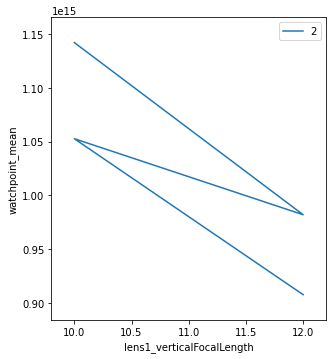

In [46]:
RE(bp.list_scan([watchpoint],
           lens1.horizontalFocalLength,F1,
           lens1.verticalFocalLength,F1,
           lens2.horizontalFocalLength,F2,
           lens2.verticalFocalLength,F2))

In [47]:
image_list = list(db[-1].data(field='watchpoint_image'))

images = np.concatenate([image[None] for image in image_list],axis=0)

nx,ny = image_list[0].shape

In [48]:
watchpoint_mean = np.asarray(db[-1].table()['watchpoint_mean'])
focalLength = np.asarray(db[-1].table()['lens1_horizontalFocalLength'])

In [49]:
variable_field = focalLength

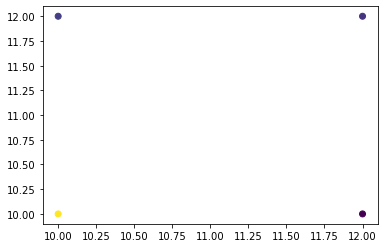

In [50]:
plt.scatter(F1,F2,c=images.max(axis=(-1,-2)))

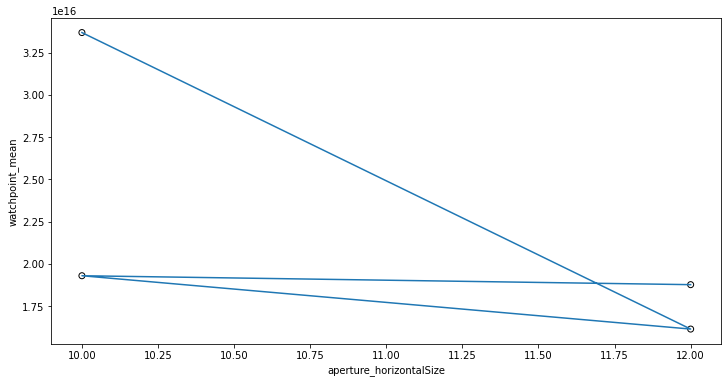

In [51]:
plt.figure(figsize=(12,6))
plt.scatter(focalLength,images.max(axis=(-1,-2)),fc='none',ec='k')
plt.plot(focalLength,images.max(axis=(-1,-2)))
plt.xlabel('aperture_horizontalSize')
plt.ylabel('watchpoint_mean')
plt.savefig('plateau.pdf')

In [52]:
vmin, vmax = np.percentile(images,q=[1,99])

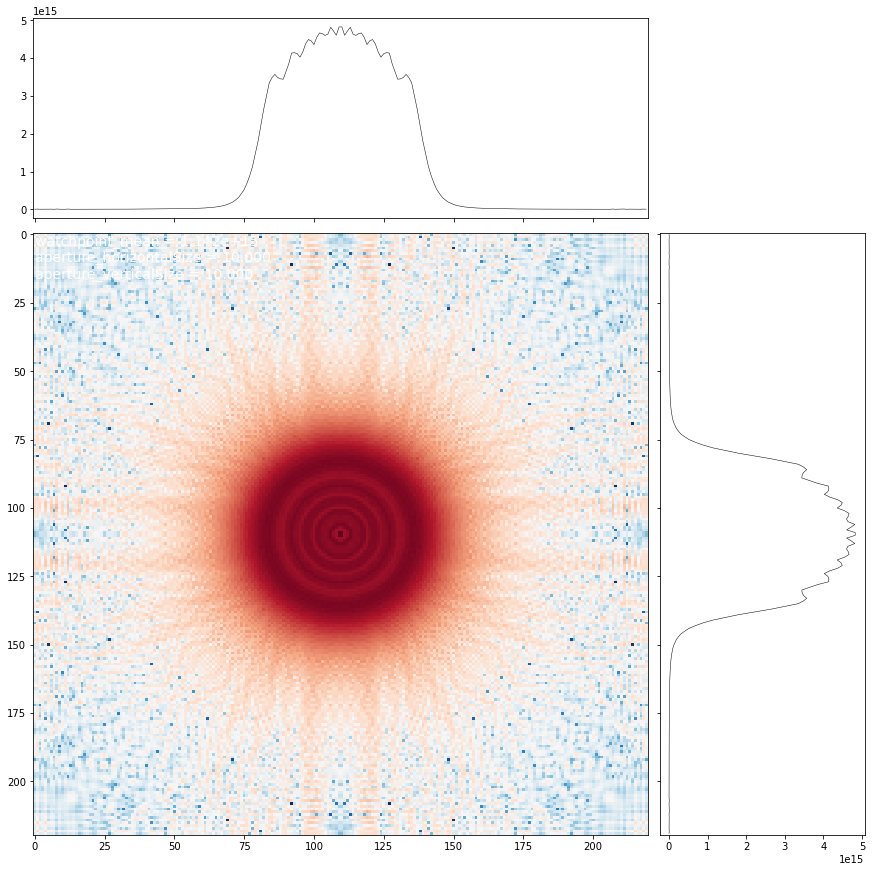

In [53]:

gs_kw = {'width_ratios' : [3,1], 'height_ratios' : [1,3]}

import matplotlib as mpl
from matplotlib import animation, rc
from IPython.display import HTML

fig, axes = plt.subplots(figsize=(12,12), ncols=2, nrows=2, sharex='col', sharey='row', constrained_layout=True,
                             gridspec_kw=gs_kw)

i0 = 0

axes[0,1].set_axis_off()


log_norm = mpl.colors.LogNorm()

label  = f'watchpoint_mean = {watchpoint_mean[i0]:.06e}'
label += f'\nFocalLength = {variable_field[i0]:.03f}'

ref = axes[1,0].imshow(images[i0].T,aspect='auto',cmap='RdBu_r',interpolation='none',norm=log_norm)#,vmin=vmin,vmax=vmax)
leg = axes[1,0].text(0,0,ha='left',va='top',s=label,c='w',fontsize=14)
axes[1,1].plot(images[i0].mean(axis=0),np.arange(ny),color='k',lw=5e-1)
axes[0,0].plot(np.arange(nx),images[i0].mean(axis=1),color='k',lw=5e-1)

def animate(i):

    label  = f'watchpoint_mean = {watchpoint_mean[i]:.03e}'
    label += f'\naperture_horizontalSize = {variable_field[i]:.03f}'
    label += f'\naperture_verticalSize = {variable_field[i]:.03f}'
    
    axes[1,0].cla(); axes[1,0].imshow(images[i].T,aspect='auto',cmap='RdBu_r',interpolation='none',norm=log_norm)#,vmin=vmin,vmax=vmax)
    axes[1,1].cla(); axes[1,1].plot(images[i].mean(axis=0),np.arange(ny),color='k',lw=5e-1)
    axes[0,0].cla(); axes[0,0].plot(np.arange(nx),images[i].mean(axis=1),color='k',lw=5e-1)
    leg = axes[1,0].text(0,0,ha='left',va='top',s=label,c='w',fontsize=14)
    
    #axes[1,0].set_xlim(30,130)

    return ref, leg

anim = animation.FuncAnimation(fig, animate, frames=images.shape[0], interval=100, blit=True)

In [30]:
HTML(anim.to_html5_video())

In [65]:
anim.save('00000001.mp4',dpi=256,bitrate=2048)

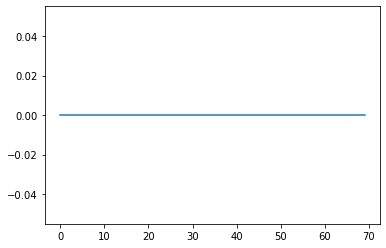

In [18]:
plt.plot(image.mean(axis=0))

In [28]:
db[-1].table()

,time,aperture_verticalSize,watchpoint_sirepo_data_json,watchpoint_sirepo_data_hash,watchpoint_image,watchpoint_shape,watchpoint_mean,watchpoint_photon_energy,watchpoint_horizontal_extent,watchpoint_vertical_extent,watchpoint_id,watchpoint_title,watchpoint_type,watchpoint_element_position,aperture_horizontalSize
seq_num,,,,,,,,,,,,,,,
1,2021-11-22 15:44:20.434437990,0.0000,"{""models"": {""arbitraryMagField"": {""interpolati...",594613fcc99879e53c435ca82bfb2164a07bc12ba285fe...,ac3e3344-895d-44e5-885d-addeacfd7dcd/0,"[160, 70]",0.000000e+00,9000.0,"[-0.00024000000000000006, 0.00024]","[-0.00036, 0.0003599999999999998]",3,Watchpoint,watch,24,0.0000
2,2021-11-22 15:44:24.618479013,0.0025,"{""models"": {""arbitraryMagField"": {""interpolati...",6ddc30fb7efb906b6629c344e3307b8574462873c7d270...,02052a5a-ef52-4fb3-b8c4-23f7c5756864/0,"[160, 70]",0.000000e+00,9000.0,"[-0.00024000000000000006, 0.00024]","[-0.00036, 0.0003599999999999998]",3,Watchpoint,watch,24,0.0025
3,2021-11-22 15:44:28.791822195,0.0050,"{""models"": {""arbitraryMagField"": {""interpolati...",803b487f51160ef7b6cb5782195c2d7e0567fd753dcdce...,5ffbad15-ec0b-441c-ab05-4b40c5ecac47/0,"[160, 70]",0.000000e+00,9000.0,"[-0.00024000000000000006, 0.00024]","[-0.00036, 0.0003599999999999998]",3,Watchpoint,watch,24,0.0050
4,2021-11-22 15:44:32.998684883,0.0075,"{""models"": {""arbitraryMagField"": {""interpolati...",ec6add69b5307f1ae1bed6d1207cbef872154a71c567d0...,d75fb20a-005b-471a-976e-72d00f640ea3/0,"[160, 70]",9.115484e+11,9000.0,"[-0.00021046925297427526, 0.00021046925297427526]","[-0.00033617941971012764, 0.0003361794197101274]",3,Watchpoint,watch,24,0.0075
5,2021-11-22 15:44:37.227557182,0.0100,"{""models"": {""arbitraryMagField"": {""interpolati...",c66ea074a792fd24b113bdb8aefa234cf7758d398a148a...,89ccb092-a8d9-403f-a3ce-39bcfeb55c0f/0,"[160, 70]",9.115484e+11,9000.0,"[-0.00021046925297427526, 0.00021046925297427526]","[-0.00033617941971012764, 0.0003361794197101274]",3,Watchpoint,watch,24,0.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2021-11-22 15:51:04.682157040,0.2400,"{""models"": {""arbitraryMagField"": {""interpolati...",88139999788df69cb16dc93afa2f4bbf1f9a5ce718afac...,8a228539-bd63-43c5-ae79-44dd60056046/0,"[160, 70]",5.507332e+14,9000.0,"[-0.0002160635415840561, 0.00021606354158405604]","[-0.00032326208001337364, 0.0003232620800133734]",3,Watchpoint,watch,24,0.2400
98,2021-11-22 15:51:08.870042801,0.2425,"{""models"": {""arbitraryMagField"": {""interpolati...",f7edfd40f879cb185b72f90cafa122e91d0c9901af420c...,e3f0974d-a86f-4c30-82ff-b0cb31085f3b/0,"[160, 70]",5.507332e+14,9000.0,"[-0.0002160635415840561, 0.00021606354158405604]","[-0.00032326208001337364, 0.0003232620800133734]",3,Watchpoint,watch,24,0.2425
99,2021-11-22 15:51:14.100790977,0.2450,"{""models"": {""arbitraryMagField"": {""interpolati...",11fcd6d04eb529e9bea4b8c94a61818da630a96da9005d...,1503ca1f-549c-4201-a53b-160a5039fe8e/0,"[160, 70]",5.507332e+14,9000.0,"[-0.0002160635415840561, 0.00021606354158405604]","[-0.00032326208001337364, 0.0003232620800133734]",3,Watchpoint,watch,24,0.2450


In [27]:
db[-1]

In [39]:
watchpoint.element_position.kind = 'normal'

In [40]:
watchpoint.summary()

data keys (* hints)
-------------------
 watchpoint_element_position
 watchpoint_horizontal_extent
 watchpoint_id
 watchpoint_image
*watchpoint_mean
 watchpoint_photon_energy
 watchpoint_shape
 watchpoint_sirepo_data_hash
 watchpoint_sirepo_data_json
 watchpoint_title
 watchpoint_type
 watchpoint_vertical_extent

read attrs
----------
sirepo_data_json     Signal              ('watchpoint_sirepo_data_json')
sirepo_data_hash     Signal              ('watchpoint_sirepo_data_hash')
image                ExternalFileReference('watchpoint_image')
shape                Signal              ('watchpoint_shape')
mean                 Signal              ('watchpoint_mean')
photon_energy        Signal              ('watchpoint_photon_energy')
horizontal_extent    Signal              ('watchpoint_horizontal_extent')
vertical_extent      Signal              ('watchpoint_vertical_extent')
id                   SirepoSignal        ('watchpoint_id')
title                SirepoSignal        ('watchpoint_ti

In [ ]:
@pytest.fixture(scope="function")
def srw_basic_simulation(make_dirs):
    connection = SirepoBluesky("http://localhost:8000")
    data, _ = connection.auth("srw", "00000001")
    return connection